#📌 Extracão

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [3]:
df = pd.read_json(url)

In [4]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [5]:
customer = pd.json_normalize(df['customer'])
phone = pd.json_normalize(df['phone'])
internet = pd.json_normalize(df['internet'])
account = pd.json_normalize(df['account'])
df = df[['customerID', 'Churn']]

In [6]:
df_raw = pd.concat([df, customer, phone, internet, account], axis=1)

In [7]:
df_raw.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

#🔧 Transformação

#### 1. Pré-análise dos dados

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [9]:
df_raw.duplicated().sum()

np.int64(0)

Percebe-se que não existem dados nulos e linhas duplicadas na DataFrame original.

#### 2. Verificando dados numéricos

In [10]:
df_raw.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


#### 3. Aplicando transformações nos dados numéricos

In [11]:
# Renomeando as colunas 'Charges.Monthly' e 'Charges.Total'
df_raw.rename(columns={'Charges.Monthly':'ChargesMonthly',
                       'Charges.Total': 'ChargesTotal'}, inplace=True)

In [12]:
# Passando a coluna 'ChargesTotal' para float
df_raw['ChargesTotal'] = pd.to_numeric(df_raw['ChargesMonthly'], errors='coerce')

In [13]:
# Criando a coluna contas diárias 'ChargesDaily'
df_raw['ChargesDaily'] = df_raw['ChargesTotal'] / 30

#### 4. Verificando dados categóricos

In [14]:
df_raw.describe(include='object')

,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445


In [15]:
# Visualizando as informações que estão contidas nas colunas
for column in df_raw.columns:
    print(f"Coluna: {column}")
    print(df_raw[column].unique())
    print("-"*100)

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
----------------------------------------------------------------------------------------------------
Coluna: Churn
['No' 'Yes' '']
----------------------------------------------------------------------------------------------------
Coluna: gender
['Female' 'Male']
----------------------------------------------------------------------------------------------------
Coluna: SeniorCitizen
[0 1]
----------------------------------------------------------------------------------------------------
Coluna: Partner
['Yes' 'No']
----------------------------------------------------------------------------------------------------
Coluna: Dependents
['Yes' 'No']
----------------------------------------------------------------------------------------------------
Coluna: tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 7

#### 5. Aplicando transformações nos dados categóricos

In [16]:
# Verificando a quantidade de dados ausentes na coluna 'Churn'
df_raw[df_raw['Churn'] == ''].shape[0]

224

In [17]:
# Filtrando o DataFrame para pegar apenas células preenchidas com "Sim" e "Não" na coluna de 'Churn'
df_raw = df_raw[df_raw['Churn'] != '']

In [18]:
# Substituindo as colunas binárias por 0 e 1
binary_columns = [col for col in df_raw.columns if sorted(df_raw[col].unique()) == ['No', 'Yes']]
df_raw[binary_columns] = df_raw[binary_columns].replace({'Yes': 1, 'No': 0})

<ipython-input-18-2293530590>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_raw[binary_columns] = df_raw[binary_columns].replace({'Yes': 1, 'No': 0})


#### 6. Vericando transformações e criando uma cópia para análise

In [19]:
df_raw

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,ChargesDaily
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,65.60,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,59.90,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,73.90,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,98.00,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,...,No,Yes,No,No,One year,0,Mailed check,55.15,55.15,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,85.10,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,50.30,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,67.85,2.261667


In [20]:
df_curated = df_raw.copy()

#📊 Carga e análise

#### 1. Distribuição da evasão

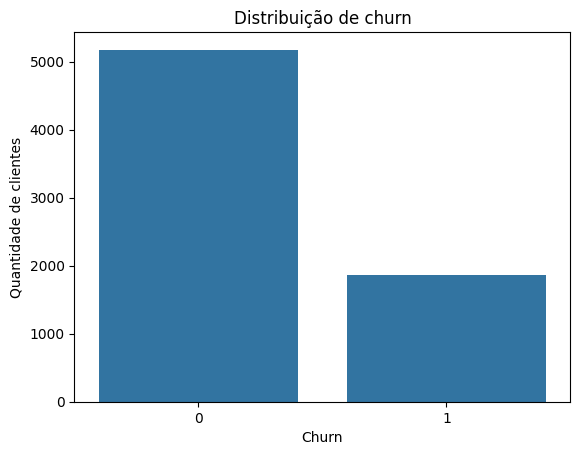

In [21]:
sns.countplot(data=df_curated, x='Churn')
plt.title('Distribuição de churn')
plt.ylabel('Quantidade de clientes')
plt.show()

#### 2. Contagem de evasão por variáveis categóricas

- [x] Gênero

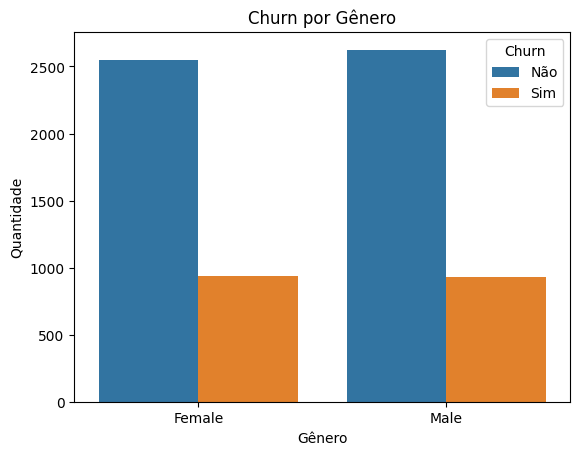

In [22]:
sns.countplot(data=df_curated, x='gender', hue='Churn')
plt.title('Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()


- [x] Tipo de contrato

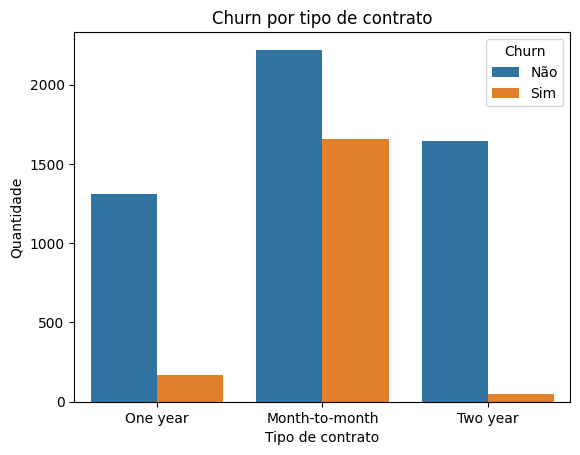

In [23]:
sns.countplot(data=df_curated, x='Contract', hue='Churn')
plt.title('Churn por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Quantidade')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

- [x] Método de pagamento

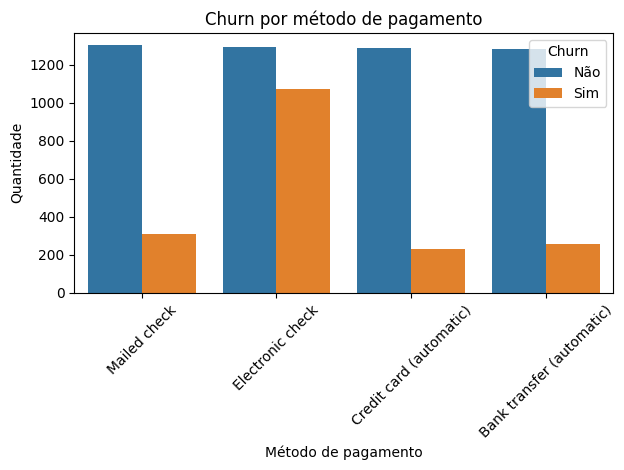

In [24]:
sns.countplot(data=df_curated, x='PaymentMethod', hue='Churn')
plt.title('Churn por método de pagamento')
plt.xlabel('Método de pagamento')
plt.ylabel('Quantidade')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- [x] Cliente tem idade maior que 65 anos?

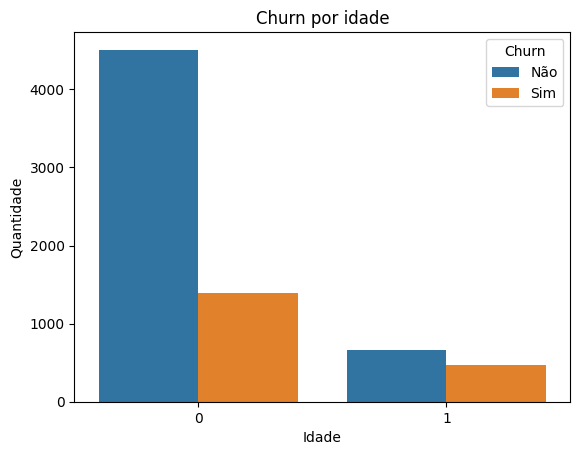

In [25]:
sns.countplot(data=df_curated, x='SeniorCitizen', hue='Churn')
plt.title('Churn por idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

- [x] O Cliente tem dependentes?

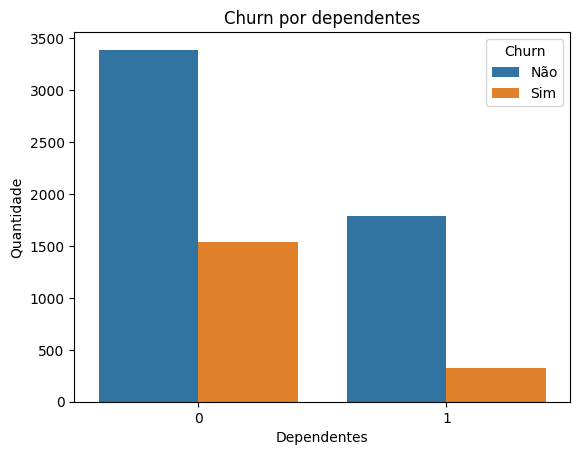

In [26]:
sns.countplot(data=df_curated, x='Dependents', hue='Churn')
plt.title('Churn por dependentes')
plt.xlabel('Dependentes')
plt.ylabel('Quantidade')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

#### 3. Contagem de evasão por variáveis numéricas

- [x] Tenure

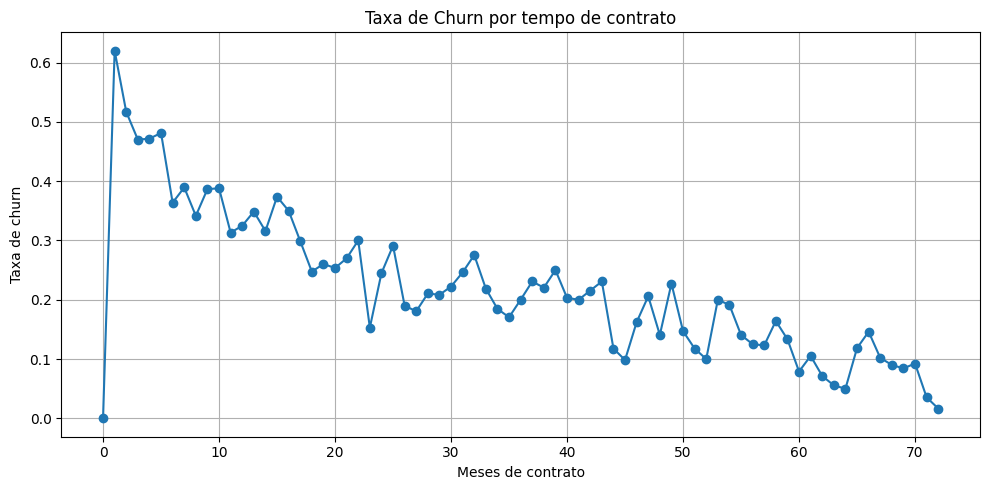

In [27]:
df_curated['Churn_Label'] = df_curated['Churn'].map({0: 'Não', 1: 'Sim'})

# Agrupando total de clientes por mês
total_por_mes = df_curated.groupby('tenure').size()

# Quantos cancelaram por mês
cancelamentos_por_mes = df_curated[df_curated['Churn'] == 1].groupby('tenure').size()

# Calculando a taxa de churn
taxa_churn = (cancelamentos_por_mes / total_por_mes).fillna(0)

plt.figure(figsize=(10, 5))
plt.plot(taxa_churn.index, taxa_churn.values, marker='o')
plt.title('Taxa de Churn por tempo de contrato')
plt.xlabel('Meses de contrato')
plt.ylabel('Taxa de churn')
plt.grid(True)
plt.tight_layout()
plt.show()



- [x] ChargesTotal

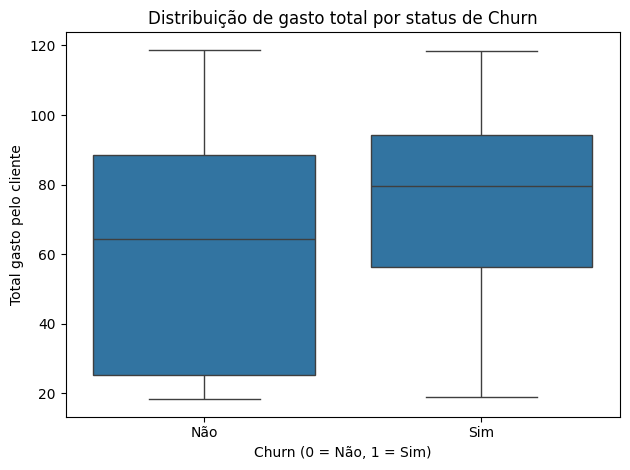

In [28]:
sns.boxplot(data=df_curated, x='Churn', y='ChargesTotal')

plt.title('Distribuição de gasto total por status de Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Total gasto pelo cliente')
plt.xticks([0, 1], ['Não', 'Sim'])  # Opcional: trocar legenda para texto
plt.tight_layout()
plt.show()

#📄Relatorio Final

Este projeto teve como objetivo analisar a evasão de clientes (churn) na empresa fictícia TelecomX. O churn representa o cancelamento de serviços e é um indicador crítico para a sustentabilidade do negócio. Os dados foram extraídos de um arquivo JSON contendo informações sobre clientes, planos de telefone, internet e cobranças. Após normalização e consolidação das tabelas, foi feita a limpeza dos dados, incluindo a conversão de tipos, padronização de variáveis e eliminação de registros inconsistentes.

A análise exploratória revelou que clientes com contrato mensal, pagamento via fatura eletrônica e sem dependentes estão mais propensos a cancelar o serviço. Também foi observado que clientes com idade mais avançada apresentam taxas menores de churn. A variável `tenure` mostrou que a evasão é muito mais comum nos primeiros meses de contrato, especialmente no primeiro mês, sugerindo que a retenção inicial é fundamental para reduzir cancelamentos.

Ao analisar os gastos totais (`ChargesTotal`), identificou-se que clientes que cancelam tendem a gastar menos com os serviços da empresa. Isso pode indicar menor engajamento ou percepção reduzida de valor. Clientes que permanecem, por outro lado, apresentam mediana de gasto mais alta. Essa diferença reforça a importância de acompanhar o comportamento financeiro dos usuários desde o início da relação contratual.

Diante desses achados, recomenda-se investir em estratégias de retenção nos primeiros meses, como programas de boas-vindas, benefícios para contratos anuais e comunicação ativa. É importante monitorar perfis de maior risco — como os com baixo gasto e uso de fatura eletrônica — para realizar intervenções proativas. Essas ações podem contribuir significativamente para a redução do churn e o aumento da fidelização dos clientes.
